# Exercise 1: Build and Plot k-Means


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Step 1:** create blobs with the size of 500, and center of 3

In [7]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=500, centers=3,
                       cluster_std=0.60, random_state=0)

**Step 2:** Plot the distribution of the blobs

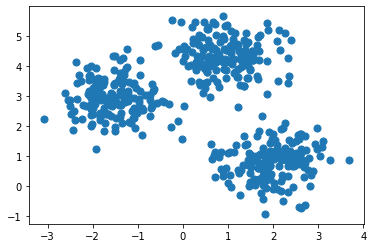

In [8]:
plt.scatter(X[:, 0], X[:, 1], s=50);

**Step 3:** Use K-means, find the centers of these clusters

In [9]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

**Step 4:** Plot the blobs with the found centers

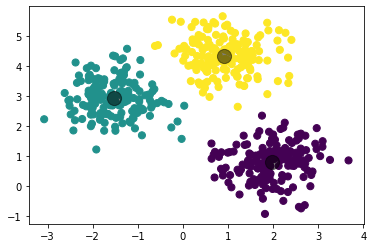

In [15]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

### Additional/Optional:

Step 5: How can you find out the automatically assigned "labels" in the produced clusters?

Step 6: How about classes? How to find out where there are classes.

# Exercise 2: k-Means with the Iris dataset


**Step 1:** Load the iris dataset from sklearn and other necessary libraries

In [20]:
import matplotlib.pyplot as plt
from sklearn import datasets
iris = datasets.load_iris()

**Step 2:** Set the training and target data as X and y respectively. Display the targets.

In [26]:
X = iris.data[:, :2]  
y = iris.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Text(0, 0.5, 'Sepal width')

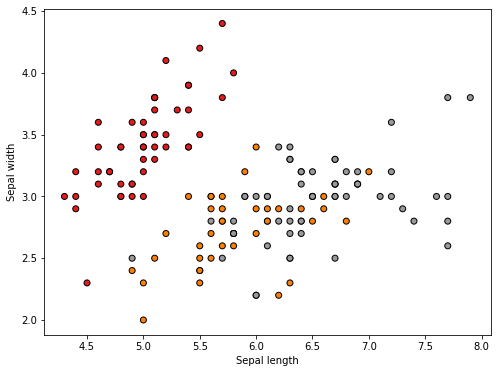

In [31]:
#Plot the training points
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

plt.figure(2, figsize=(8, 6))
plt.clf()
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor="k")
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

Introducing - *the Elbow Method:*
A technique to allow you to identify the best K

General idea: iterate the creation of k-Means clusters with increasing sizes, and record down the value of kmeans.inertia_ (inertia_: Sum of squared distances of samples to their closest cluster center.)

**Step 3:** create a list named wcss and store the inertia values for a selected range of ks.

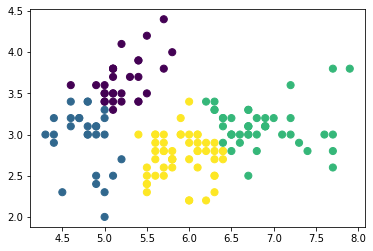

In [33]:
import numpy as np
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    wcss = np.random.RandomState(rseed)
    i = wcss.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    while True:
        # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)
        
        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])
        
        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels

centers, labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

In [34]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

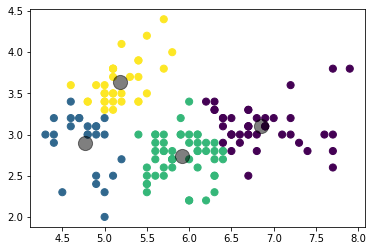

In [35]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

**Step 4:** Plot a graph to look at 'The elbow'

In [36]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
 
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
 
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_

C:\Users\huimunte\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\huimunte\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [38]:
for key, val in mapping1.items():
    print(f'{key} : {val}')

1 : 0.8362595542992223
2 : 0.5568614667891987
3 : 0.4184268341735375
4 : 0.3760792063435208
5 : 0.33193272560940595
6 : 0.3050344286863343
7 : 0.27693487645455866
8 : 0.2571465248522728
9 : 0.24653992578713943


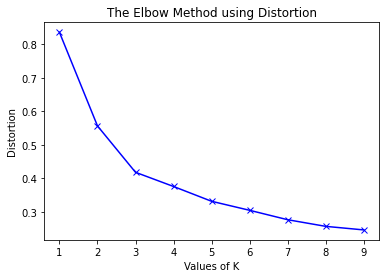

In [39]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

In [40]:
for key, val in mapping2.items():
    print(f'{key} : {val}')

1 : 130.4752666666667
2 : 58.204092789066756
3 : 37.0507021276596
4 : 28.011149160808465
5 : 21.002125982249428
6 : 17.407916182733246
7 : 14.828543464836567
8 : 12.742864893408
9 : 11.18570282495283


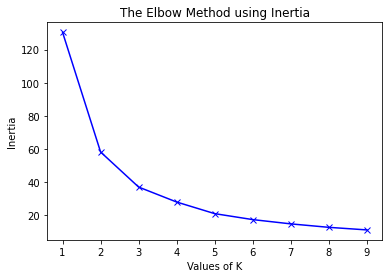

In [41]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

**Step 5:** Apply the best K for your k-means clustering

In [46]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=6)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

**Step 6:** Visualize the clusters. Name the clusters accordingly, and also plot the centriods.


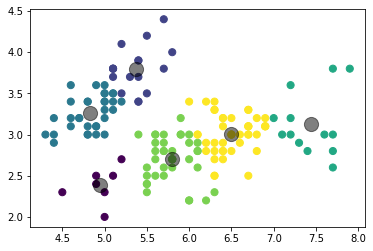

In [56]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

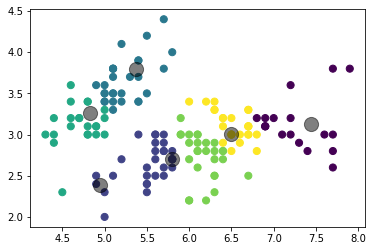

In [66]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=6, affinity='nearest_neighbors',
                           assign_labels='kmeans')

labels = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');
centers =kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

### Additional/Optional:

**Step 7:** Plot the actual and Predicted side by side